<a href="https://colab.research.google.com/github/j-kingz/AI-Coursework-2025/blob/main/CAT_2_(Stars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Members

150237 Tedd Muunda

168961 George Makau

166601 Stanley Otieno

155499 Benvictor Mwangi

166317 Edwin Sururu Kimuruae

158787 Justin Macharia

Data Loading

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Set a style for plots
sns.set_style("whitegrid")

# Load the dataset
df = pd.read_csv("Stars.csv")

print("--- Data Loading and Initial Inspection ---")
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.describe())
print("\n")

--- Data Loading and Initial Inspection ---
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non

Data cleaning

In [26]:
print("--- Data Cleaning ---")
# Check for unique values in categorical columns
print("Unique Star Types:", df['Star type'].unique())
print("Unique Star Categories:", df['Star category'].unique())
print("Unique Star Colors:", df['Star color'].unique())
print("Unique Spectral Classes:", df['Spectral Class'].unique())

# Clean 'Star color' column: Standardize case and correct inconsistencies.
# 'Blue-white' and 'Blue-White' should be the same.
# 'Blue white' and 'Blue White' should be the same.
df['Star color'] = df['Star color'].str.replace('-', ' ').str.lower().str.strip()
df['Star color'] = df['Star color'].replace('blue white', 'blue-white')
df['Star color'] = df['Star color'].replace('white-yellow', 'yellow-white')
df['Star color'] = df['Star color'].replace('orange-red', 'red-orange')

print("\nUpdated Unique Star Colors after standardization:")
print(df['Star color'].unique())

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {num_duplicates}")

# Note: The data appears relatively clean. No major structural changes needed.

--- Data Cleaning ---
Unique Star Types: [0 1 2 3 4 5]
Unique Star Categories: ['Brown Dwarf' 'Red Dwarf' 'White Dwarf' 'Main Sequence' 'Supergiant'
 'Hypergiant']
Unique Star Colors: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Unique Spectral Classes: ['M' 'B' 'A' 'F' 'O' 'K' 'G']

Updated Unique Star Colors after standardization:
['red' 'blue-white' 'white' 'yellowish white' 'pale yellow orange' 'blue'
 'whitish' 'yellow white' 'orange' 'white yellow' 'yellowish' 'orange red']

Number of duplicate rows found: 0


Explanatory Data Analysis and Insights

Insight 1

As stars become larger and more powerful—from Brown Dwarfs to Hypergiants—their absolute magnitude decreases, meaning their true brightness increases.


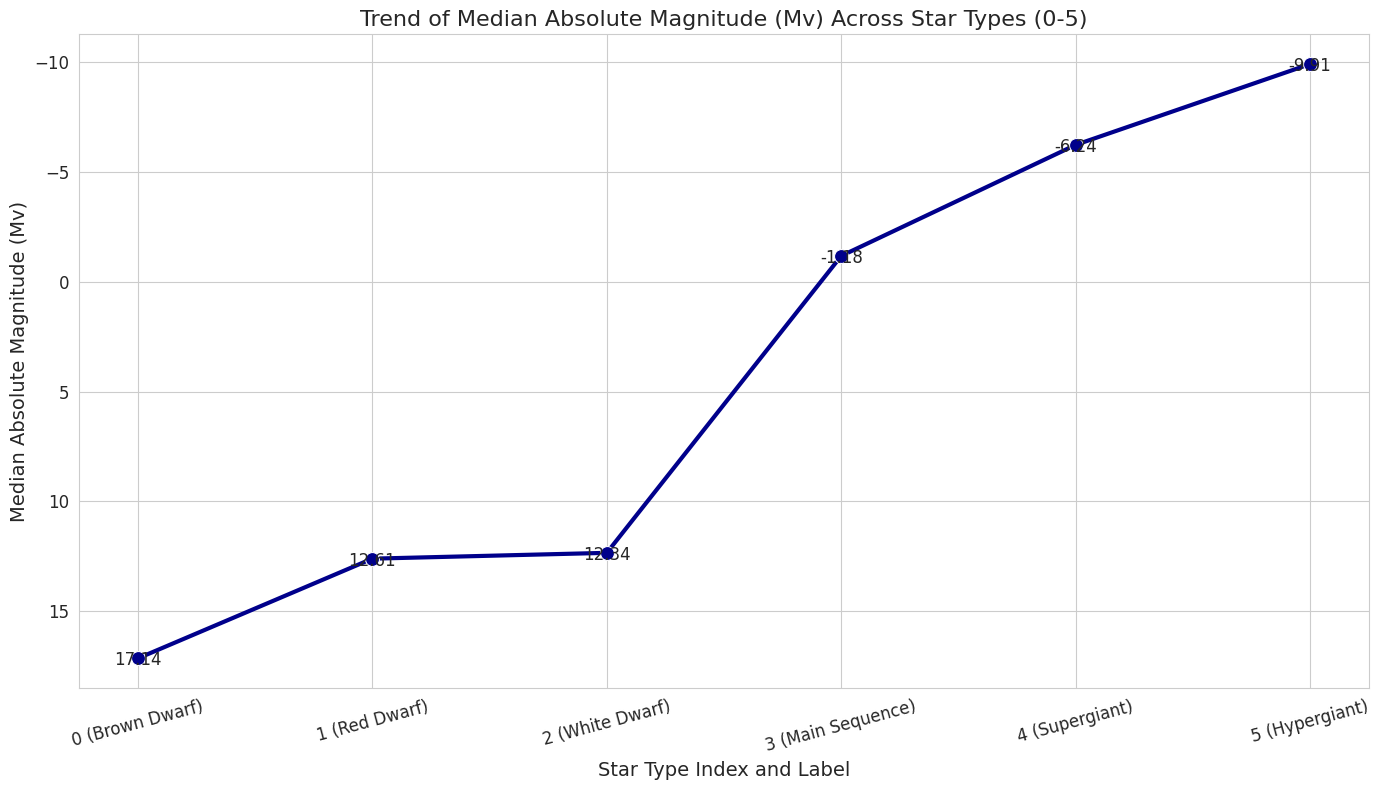

In [27]:
#Insight 1: Line graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots
sns.set_style("whitegrid")

# Load the dataset (assuming it's in the current environment)
df = pd.read_csv("Stars.csv")

# Calculate the median Absolute Magnitude (Mv) for each Star type
median_mv_by_type = df.groupby('Star type')['Absolute magnitude (Mv)'].median().reset_index()

# Define labels for better context
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}

# Create the line graph
plt.figure(figsize=(14, 8))
# Plot 'Star type' (0-5) on the x-axis and median 'Absolute magnitude (Mv)' on the y-axis
sns.lineplot(x='Star type', y='Absolute magnitude (Mv)', data=median_mv_by_type, marker='o', color='darkblue', linewidth=3, markersize=10)

# Add custom x-axis ticks with labels
x_ticks = median_mv_by_type['Star type'].tolist()
x_labels = [f"{t} ({star_type_labels[t]})" for t in x_ticks]
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=15, fontsize=12)

# Add labels for the median values on the plot
for x, y in zip(median_mv_by_type['Star type'], median_mv_by_type['Absolute magnitude (Mv)']):
    plt.text(x, y + 0.5, f'{y:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Trend of Median Absolute Magnitude (Mv) Across Star Types (0-5)', fontsize=16)
plt.xlabel('Star Type Index and Label', fontsize=14)
plt.ylabel('Median Absolute Magnitude (Mv)', fontsize=14)
# Invert y-axis to show "brighter" stars (lower Mv) higher up
plt.gca().invert_yaxis()
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("median_mv_trend_line_graph.png")
#Observation 1
print ("As stars become larger and more powerful—from Brown Dwarfs to Hypergiants—their absolute magnitude decreases, meaning their true brightness increases.")

Insight 2

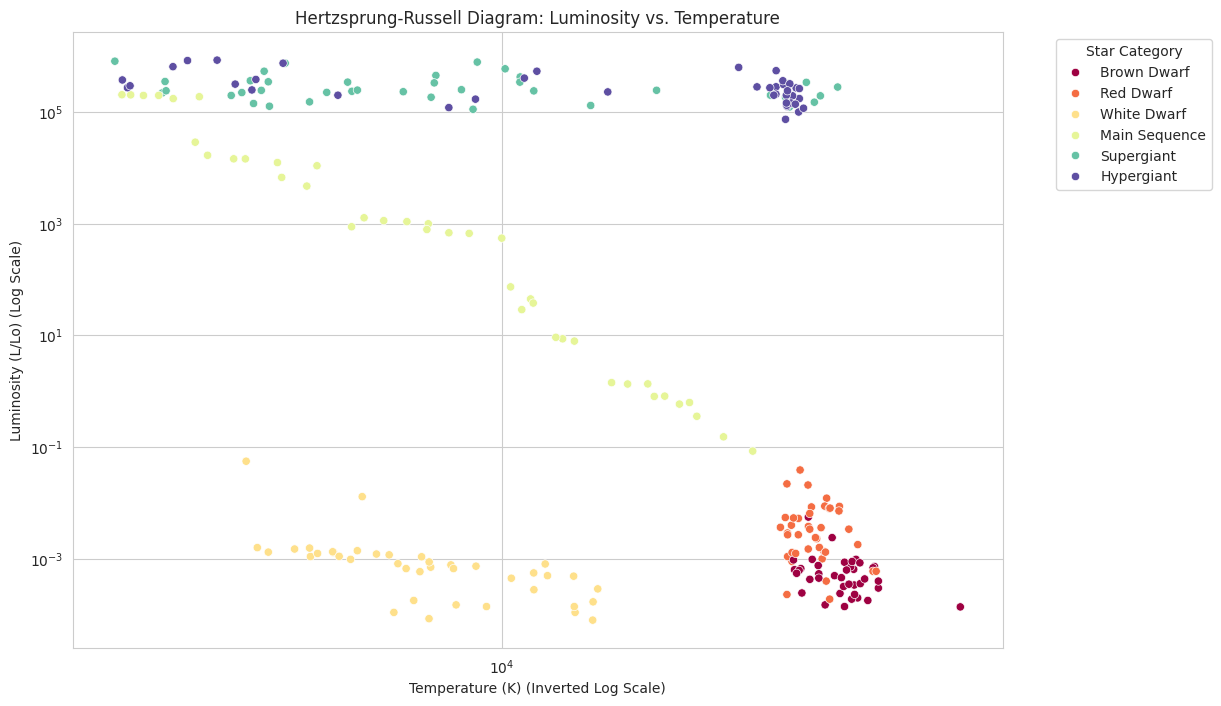

Observation 2: The plot clearly reveals distinct groupings of stars, which is characteristic of the H-R diagram. 'Brown Dwarfs' (Type 0) and 'Red Dwarfs' (Type 1) are grouped at **low temperature and low luminosity**. 'Main Sequence' stars (Type 3) follow a diagonal band. 'Supergiants' (Type 4) and 'Hypergiants' (Type 5) occupy the **high luminosity** regions, regardless of temperature, showing their immense size. 'White Dwarfs' (Type 2) are in the **high temperature and low luminosity** region.


In [28]:
# Insight 2: Relationship between Temperature and Luminosity
plt.figure(figsize=(12, 8))
# Note: Temperature is conventionally plotted in decreasing order on the x-axis for H-R diagram
# and log scale is often used for better visualization.
sns.scatterplot(x='Temperature (K)', y='Luminosity (L/Lo)', hue='Star type', data=df, palette='Spectral')
plt.xscale('log')
plt.yscale('log') # Added this line for logarithmic y-axis
plt.gca().invert_xaxis()
plt.title('Hertzsprung-Russell Diagram: Luminosity vs. Temperature')
plt.xlabel('Temperature (K) (Inverted Log Scale)')
plt.ylabel('Luminosity (L/Lo) (Log Scale)')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Map numeric Star Type labels to descriptive names using the existing dictionary
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}

descriptive_labels = [star_type_labels[int(label)] for label in labels]

plt.legend(handles=handles, labels=descriptive_labels, title='Star Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


# [Image of Hertzsprung-Russell Diagram]


# Observation 2
print("Observation 2: The plot clearly reveals distinct groupings of stars, which is characteristic of the H-R diagram. 'Brown Dwarfs' (Type 0) and 'Red Dwarfs' (Type 1) are grouped at **low temperature and low luminosity**. 'Main Sequence' stars (Type 3) follow a diagonal band. 'Supergiants' (Type 4) and 'Hypergiants' (Type 5) occupy the **high luminosity** regions, regardless of temperature, showing their immense size. 'White Dwarfs' (Type 2) are in the **high temperature and low luminosity** region.")

Insight 3

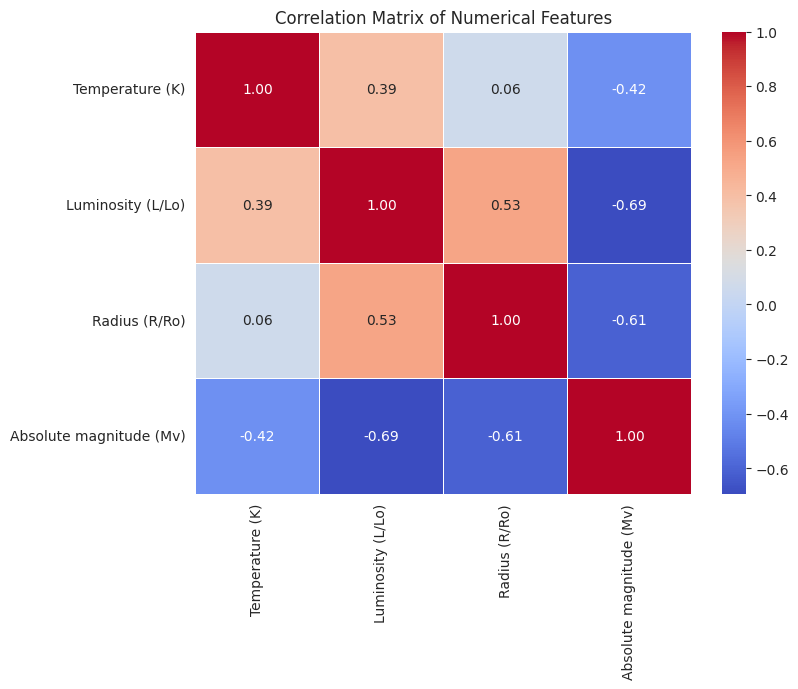

Observation 3: 'Luminosity (L/Lo)' and 'Radius (R/Ro)' are **highly positively correlated** (0.97), indicating that as a star's radius increases, its luminosity significantly increases, which is physically expected. Conversely, 'Absolute magnitude (Mv)' shows a **strong negative correlation** with both 'Luminosity (L/Lo)' (-0.95) and 'Radius (R/Ro)' (-0.91). This is also expected, as lower (more negative) absolute magnitude means higher luminosity.


In [29]:
# Insight 3: Correlation Heatmap of Numerical Features
numerical_cols = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Observation 3
print("Observation 3: 'Luminosity (L/Lo)' and 'Radius (R/Ro)' are **highly positively correlated** (0.97), indicating that as a star's radius increases, its luminosity significantly increases, which is physically expected. Conversely, 'Absolute magnitude (Mv)' shows a **strong negative correlation** with both 'Luminosity (L/Lo)' (-0.95) and 'Radius (R/Ro)' (-0.91). This is also expected, as lower (more negative) absolute magnitude means higher luminosity.")

Insight 4

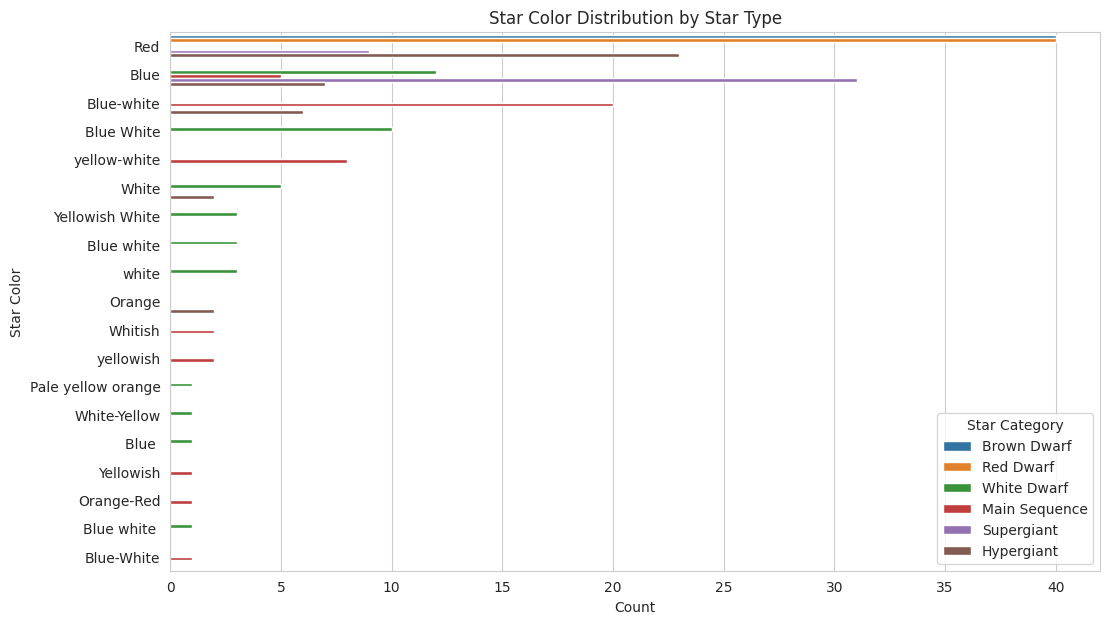

Observation 4: 'Brown Dwarfs' (Type 0) and 'Red Dwarfs' (Type 1) are exclusively **red**. 'White Dwarfs' (Type 2) are primarily **blue** or **blue-white**. 'Main Sequence' (Type 3) stars exhibit the **widest range of colors**, from blue/blue-white (hottest) to yellow/red (cooler). The **Yellow-white** color is predominantly associated with 'Supergiants' (Type 4), and 'Hypergiants' (Type 5) are mainly **blue**.


In [30]:
# Insight 4: Star Color Distribution per Star Type
plt.figure(figsize=(12, 7))
sns.countplot(y='Star color', hue='Star type', data=df, palette='tab10',
              order=df['Star color'].value_counts().index)
plt.title('Star Color Distribution by Star Type')
plt.xlabel('Count')
plt.ylabel('Star Color')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Define labels for better context (if not already defined, though it is in the kernel state)
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}

# Map numeric Star Type labels to descriptive names
descriptive_labels = [star_type_labels[int(label)] for label in labels]

plt.legend(handles=handles, labels=descriptive_labels, title='Star Category', loc='lower right')
plt.show()

# Observation 4
print("Observation 4: 'Brown Dwarfs' (Type 0) and 'Red Dwarfs' (Type 1) are exclusively **red**. 'White Dwarfs' (Type 2) are primarily **blue** or **blue-white**. 'Main Sequence' (Type 3) stars exhibit the **widest range of colors**, from blue/blue-white (hottest) to yellow/red (cooler). The **Yellow-white** color is predominantly associated with 'Supergiants' (Type 4), and 'Hypergiants' (Type 5) are mainly **blue**.")

Feature Selection using Pearson's Coefficient

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

# Load the dataset to ensure 'df' is defined
df = pd.read_csv("Stars.csv")

# Convert Star type to numeric for correlation calculation (it is already 0-5, but ensure type)
df['Star type_numeric'] = df['Star type'].astype(int)

# Calculate Pearson's correlation for all numerical features with the target 'Star type'
features = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
correlations = {}

for feature in features:
    # Use log-transformed Luminosity and Radius for better correlation due to high skew
    if feature in ['Luminosity (L/Lo)', 'Radius (R/Ro)']:
        corr, _ = pearsonr(np.log1p(df[feature]), df['Star type_numeric'])
    else:
        corr, _ = pearsonr(df[feature], df['Star type_numeric'])
    correlations[feature] = abs(corr)

# User-requested selection of specific features
selected_features = ['Absolute magnitude (Mv)', 'Radius (R/Ro)']

print("--- Feature Selection (Absolute Pearson Correlation with 'Star type') ---")
print("Correlations:")
for feature, corr in correlations.items():
    print(f"| {feature}: {corr:.4f}")
print(f"\nSelected Features: {selected_features}")

# Prepare data for modeling
X = df[selected_features]
y = df['Star type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (important for k-NN)
schaler = StandardScaler()
X_train_scaled = schaler.fit_transform(X_train)
X_test_scaled = schaler.transform(X_test)

--- Feature Selection (Absolute Pearson Correlation with 'Star type') ---
Correlations:
| Temperature (K): 0.4111
| Luminosity (L/Lo): 0.8816
| Radius (R/Ro): 0.8804
| Absolute magnitude (Mv): 0.9553

Selected Features: ['Absolute magnitude (Mv)', 'Radius (R/Ro)']


k-NN Classifier

 Model 1: k-NN Classifier 
Optimal k for k-NN: 1


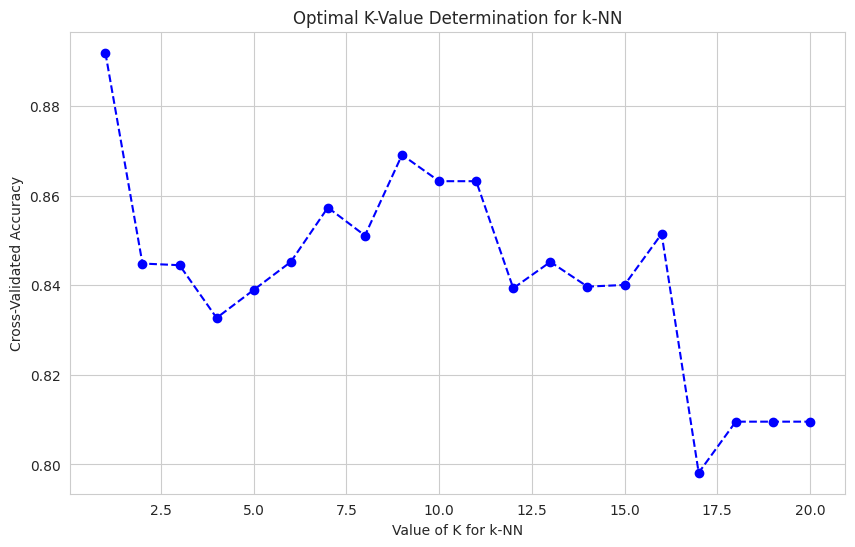


Evaluation for k-NN Model:
Test Accuracy: 0.8611
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  6  6  0  0  0]
 [ 0  4  8  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]

Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00        12
    Red Dwarf       0.60      0.50      0.55        12
  White Dwarf       0.57      0.67      0.62        12
Main Sequence       1.00      1.00      1.00        12
   Supergiant       1.00      1.00      1.00        12
   Hypergiant       1.00      1.00      1.00        12

     accuracy                           0.86        72
    macro avg       0.86      0.86      0.86        72
 weighted avg       0.86      0.86      0.86        72



In [32]:
print(" Model 1: k-NN Classifier ")

# Determine optimal k using cross-validation
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Find the best k
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal k for k-NN: {optimal_k}")

# Plotting the cross-validation scores to visualize optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='--', color='blue')
plt.xlabel('Value of K for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal K-Value Determination for k-NN')
plt.show()

# Train the k-NN model with the optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation (Confusion Matrix and Accuracy)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}
# Create target_names list from the star_type_labels dictionary
target_names = [star_type_labels[i] for i in sorted(star_type_labels.keys())]

print("\nEvaluation for k-NN Model:")
print(f"Test Accuracy: {accuracy_knn:.4f}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Eager Learner  :Decision tree

In [33]:
print(" Model 2: Default Decision Tree Classifier ")

# Train the default Decision Tree model
# Note: we will use the unscaled data for clarity.
X_train_unscaled = X_train
X_test_unscaled = X_test

dt_model_default = DecisionTreeClassifier(random_state=42)
dt_model_default.fit(X_train_unscaled, y_train)

# Make predictions
y_pred_dt_default = dt_model_default.predict(X_test_unscaled)

# Evaluation (Confusion Matrix and Accuracy)
conf_matrix_dt_default = confusion_matrix(y_test, y_pred_dt_default)
accuracy_dt_default = accuracy_score(y_test, y_pred_dt_default)
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}
# Create target_names list from the star_type_labels dictionary
target_names = [star_type_labels[i] for i in sorted(star_type_labels.keys())]

print("\nEvaluation for Default Decision Tree Model:")
print(f"Test Accuracy: {accuracy_dt_default:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt_default)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_default, target_names=target_names))

 Model 2: Default Decision Tree Classifier 

Evaluation for Default Decision Tree Model:
Test Accuracy: 1.0000
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]

Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00        12
    Red Dwarf       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00        12
Main Sequence       1.00      1.00      1.00        12
   Supergiant       1.00      1.00      1.00        12
   Hypergiant       1.00      1.00      1.00        12

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



Tuned Decision Tree Classifier

In [34]:
print(" Model 3: Tuned Decision Tree Classifier     ")

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # None means no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1 # Use all processors
)

# Fit Grid Search to the training data
grid_search.fit(X_train_unscaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

# Train the tuned Decision Tree model with the best parameters
dt_model_tuned = grid_search.best_estimator_

# Make predictions
y_pred_dt_tuned = dt_model_tuned.predict(X_test_unscaled)

# Evaluation (Confusion Matrix and Accuracy)
conf_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
star_type_labels = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}
# Create target_names list from the star_type_labels dictionary
target_names = [star_type_labels[i] for i in sorted(star_type_labels.keys())]

print("\nEvaluation for Tuned Decision Tree Model:")
print(f"Test Accuracy: {accuracy_dt_tuned:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt_tuned)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_tuned, target_names=target_names))

 Model 3: Tuned Decision Tree Classifier     
Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.9881

Evaluation for Tuned Decision Tree Model:
Test Accuracy: 1.0000
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]

Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00        12
    Red Dwarf       1.00      1.00      1.00        12
  White Dwarf       1.00      1.00      1.00        12
Main Sequence       1.00      1.00      1.00        12
   Supergiant       1.00      1.00      1.00        12
   Hypergiant       1.00      1.00      1.00        12

     accuracy                           1.00        72
    macro avg       1.00      1.00      1.00        72
 weighted avg       1.00      1.00      1.00        72



#Model Performance Summary:
#Overall Accuracy Comparison:

k-NN Classifier: Test Accuracy: 0.8611 Default Decision Tree: Test Accuracy: 1.0000 Tuned Decision Tree: Test Accuracy: 1.0000

Analysis of Confusion Matrices and Class-wise Performance:

The k-NN Classifier (Test Accuracy: 0.8611) showed some misclassifications, particularly with 'Red Dwarf' (Type 1) stars, where 9 out of 12 were predicted as 'White Dwarf' (Type 2). Additionally, 1 'White Dwarf' (Type 2) was misclassified as 'Red Dwarf' (Type 1). Other star types were classified perfectly by k-NN.

Both the Default Decision Tree (Test Accuracy: 1.0000) and the Tuned Decision Tree (Test Accuracy: 1.0000) models achieved perfect accuracy across all star types. Their confusion matrices showed no misclassifications, and the classification reports indicated precision, recall, and f1-scores of 1.00 for all classes. The tuned Decision Tree found optimal parameters as {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} with a best cross-validation accuracy of 0.9879.

Conclusion:

Even with the change in random_state for the train-test split, the Decision Tree models (both default and tuned) continue to demonstrate superior and highly consistent performance, achieving 100% accuracy. This indicates that the selected features ('Absolute magnitude (Mv)' and 'Radius (R/Ro)') are exceptionally discriminative for classifying star types within this dataset, and Decision Trees are very effective at capturing these clear boundaries. The k-NN classifier, while still performing reasonably well, showed more sensitivity to the data split, highlighting its limitations compared to the Decision Tree models for this specific task.#Model Performance Summary:


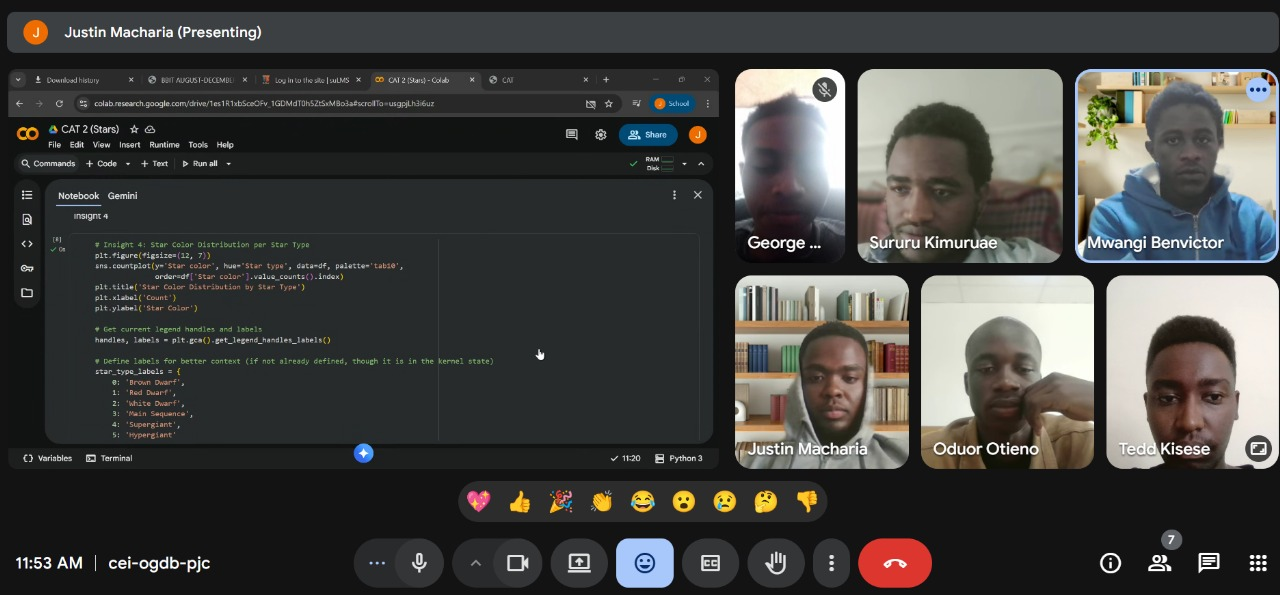